In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from seaborn import heatmap
import networkx as nx
import queue

In [48]:
def print_board(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            if j == 8:
                print(board[i][j])
            else:
                print(str(board[i][j]) + " ", end="")


Displaying Sudoku board with numbers and colorbar:


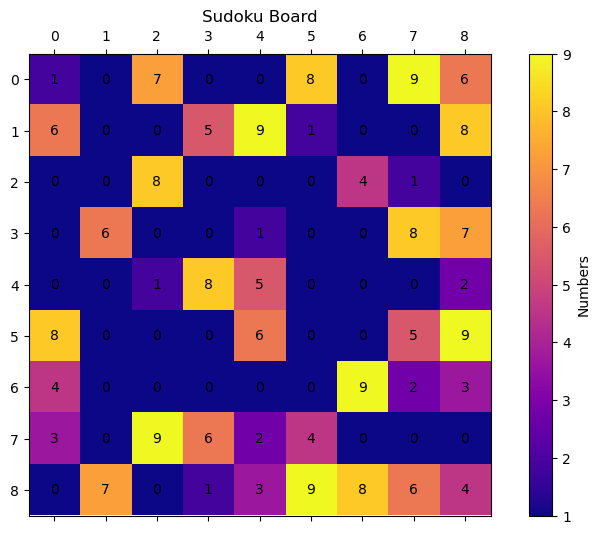


Displaying Sudoku board with empty cells highlighted and colorbar:


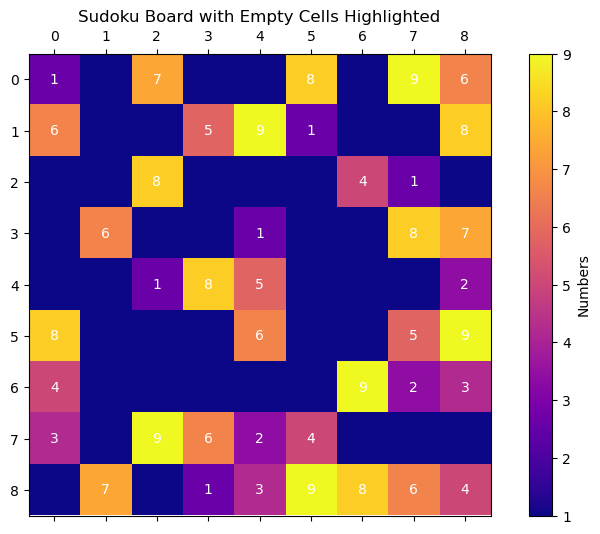

In [49]:
def showSudoku(board):
    ''' Display the Sudoku board with numbers and a colorbar
        Input : 2D NumPy array representing the Sudoku board
        Output : Display the Sudoku board with numbers and a colorbar
    '''
    fig, ax = plt.subplots(figsize=(10, 6))

    # Show Sudoku board with numbers
    ax.matshow(board, cmap='plasma')
    for i in range(9):
        for j in range(9):
            ax.text(j, i, str(board[i, j]), va='center', ha='center', color='black')

    ax.grid(visible=False)
    ax.set_title('Sudoku Board')

    # Create colorbar
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=1, vmax=9)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=np.arange(1, 10))
    cb.set_label('Numbers')
    cb.set_ticklabels(np.arange(1, 10))

    plt.show()

def showSudokuProblem(board):
    ''' Display the Sudoku board with empty cells highlighted and a colorbar
        Input : 2D NumPy array representing the Sudoku board
        Output : Display the Sudoku board with empty cells highlighted and a colorbar
    '''
    highlighted_board = np.copy(board)
    highlighted_board[highlighted_board == 0] = -1

    fig, ax = plt.subplots(figsize=(10, 6))

    # Show Sudoku board with empty cells highlighted
    ax.matshow(highlighted_board, cmap='plasma')
    for i in range(9):
        for j in range(9):
            if highlighted_board[i, j] != -1:
                ax.text(j, i, str(highlighted_board[i, j]), va='center', ha='center', color='white')

    ax.grid(visible=False)
    ax.set_title('Sudoku Board with Empty Cells Highlighted')

    # Create colorbar
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=1, vmax=9)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=np.arange(1, 10))
    cb.set_label('Numbers')
    cb.set_ticklabels(np.arange(1, 10))

    plt.show()

# Example Sudoku board
board = np.array([
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
])


print("\nDisplaying Sudoku board with numbers and colorbar:")
showSudoku(board)
print("\nDisplaying Sudoku board with empty cells highlighted and colorbar:")
showSudokuProblem(board)



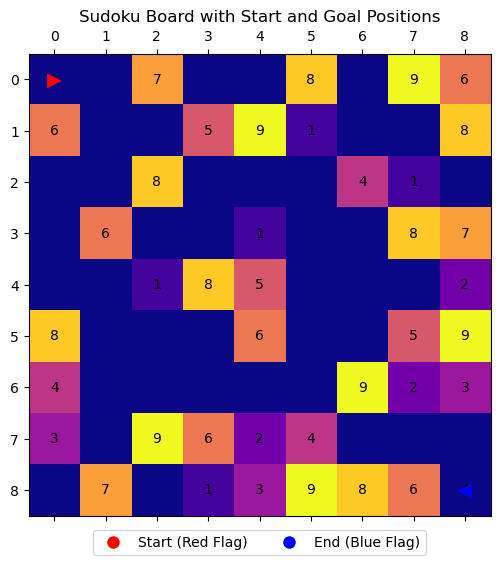

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def showSudokuProblem(board, start, goal):
    ''' Display the Sudoku board with start and end positions indicated by symbols
        Input : 2D NumPy array representing the Sudoku board
                start: tuple representing the coordinates of the start position (row, col)
                goal: tuple representing the coordinates of the goal position (row, col)
        Output : Display the Sudoku board with start and end positions indicated by symbols
    '''
    # Create a copy of the board
    board_with_positions = np.copy(board)

    # Highlight start and goal positions with symbols
    start_row, start_col = start
    goal_row, goal_col = goal
    board_with_positions[start_row, start_col] = 0
    board_with_positions[goal_row, goal_col] = 0

    # Create an arrow symbol for start and goal positions
    start_arrow = u'\u25b6'  # Right-pointing arrow
    goal_arrow = u'\u25c0'   # Left-pointing arrow

    fig, ax = plt.subplots(figsize=(6, 6))

    # Show Sudoku board with start and end positions indicated by symbols
    ax.matshow(board_with_positions, cmap='plasma')
    for i in range(9):
        for j in range(9):
            if board[i, j] != 0:
                ax.text(j, i, str(board[i, j]), va='center', ha='center', color='black')

    # Annotate start and goal positions with arrows
    ax.text(start_col, start_row, start_arrow, va='center', ha='center', color='red', fontsize=14)
    ax.text(goal_col, goal_row, goal_arrow, va='center', ha='center', color='blue', fontsize=14)

    ax.grid(visible=False)
    ax.set_title('Sudoku Board with Start and Goal Positions')

    # Add legend
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Start (Red Flag)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='End (Blue Flag)')
    ]
    ax.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.show()

# Define start and goal positions for Sudoku puzzle
START = (0, 0)  # Top-left corner (example start position)
GOAL = (8, 8)   # Bottom-right corner (example goal position)

# Example Sudoku board (with some numbers already given)
board = np.array([
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
])

# Display the Sudoku puzzle with start and goal positions indicated by symbols and legend
showSudokuProblem(board, START, GOAL)


In [51]:
class SudokuGraph(object):
    ''' Class to represent a graph for Sudoku puzzle
        Construction: Using Edges
    '''
    def __init__(self):
        self.edges = {}

    def add_edge(self, node, neighbor):
        ''' Add an edge between two nodes '''
        if node in self.edges:
            self.edges[node].add(neighbor)
        else:
            self.edges[node] = {neighbor}

    def all_edges(self):
        ''' Get all edges in the graph '''
        return self.edges

    def neighbors(self, node):
        ''' Get neighbors of a node '''
        return self.edges[node]

In [52]:
def initialize_sudoku_graph(board):
    sudoku_graph = SudokuGraph()
    board_size = len(board)

    # Create nodes for each cell
    for i in range(board_size):
        for j in range(board_size):
            sudoku_graph.edges[(i, j)] = set()

    # Add edges between cells in the same row, column, and block
    for i in range(board_size):
        for j in range(board_size):
            for k in range(board_size):
                if k != j:
                    sudoku_graph.edges[(i, j)].add((i, k))  # Row
                if k != i:
                    sudoku_graph.edges[(i, j)].add((k, j))  # Column

            subgrid_size = int(board_size ** 0.5)
            start_row, start_col = subgrid_size * (i // subgrid_size), subgrid_size * (j // subgrid_size)
            for m in range(start_row, start_row + subgrid_size):
                for n in range(start_col, start_col + subgrid_size):
                    if m != i or n != j:
                        sudoku_graph.edges[(i, j)].add((m, n))  # Block

    return sudoku_graph

In [53]:
sudoku_graph = initialize_sudoku_graph(board)

In [54]:
sudoku_graph.all_edges()

{(0, 0): {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0)},
 (0, 1): {(0, 0),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1)},
 (0, 2): {(0, 0),
  (0, 1),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 2)},
 (0, 3): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 3),
  (7, 3),
  (8, 3)},
 (0, 4): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (4, 

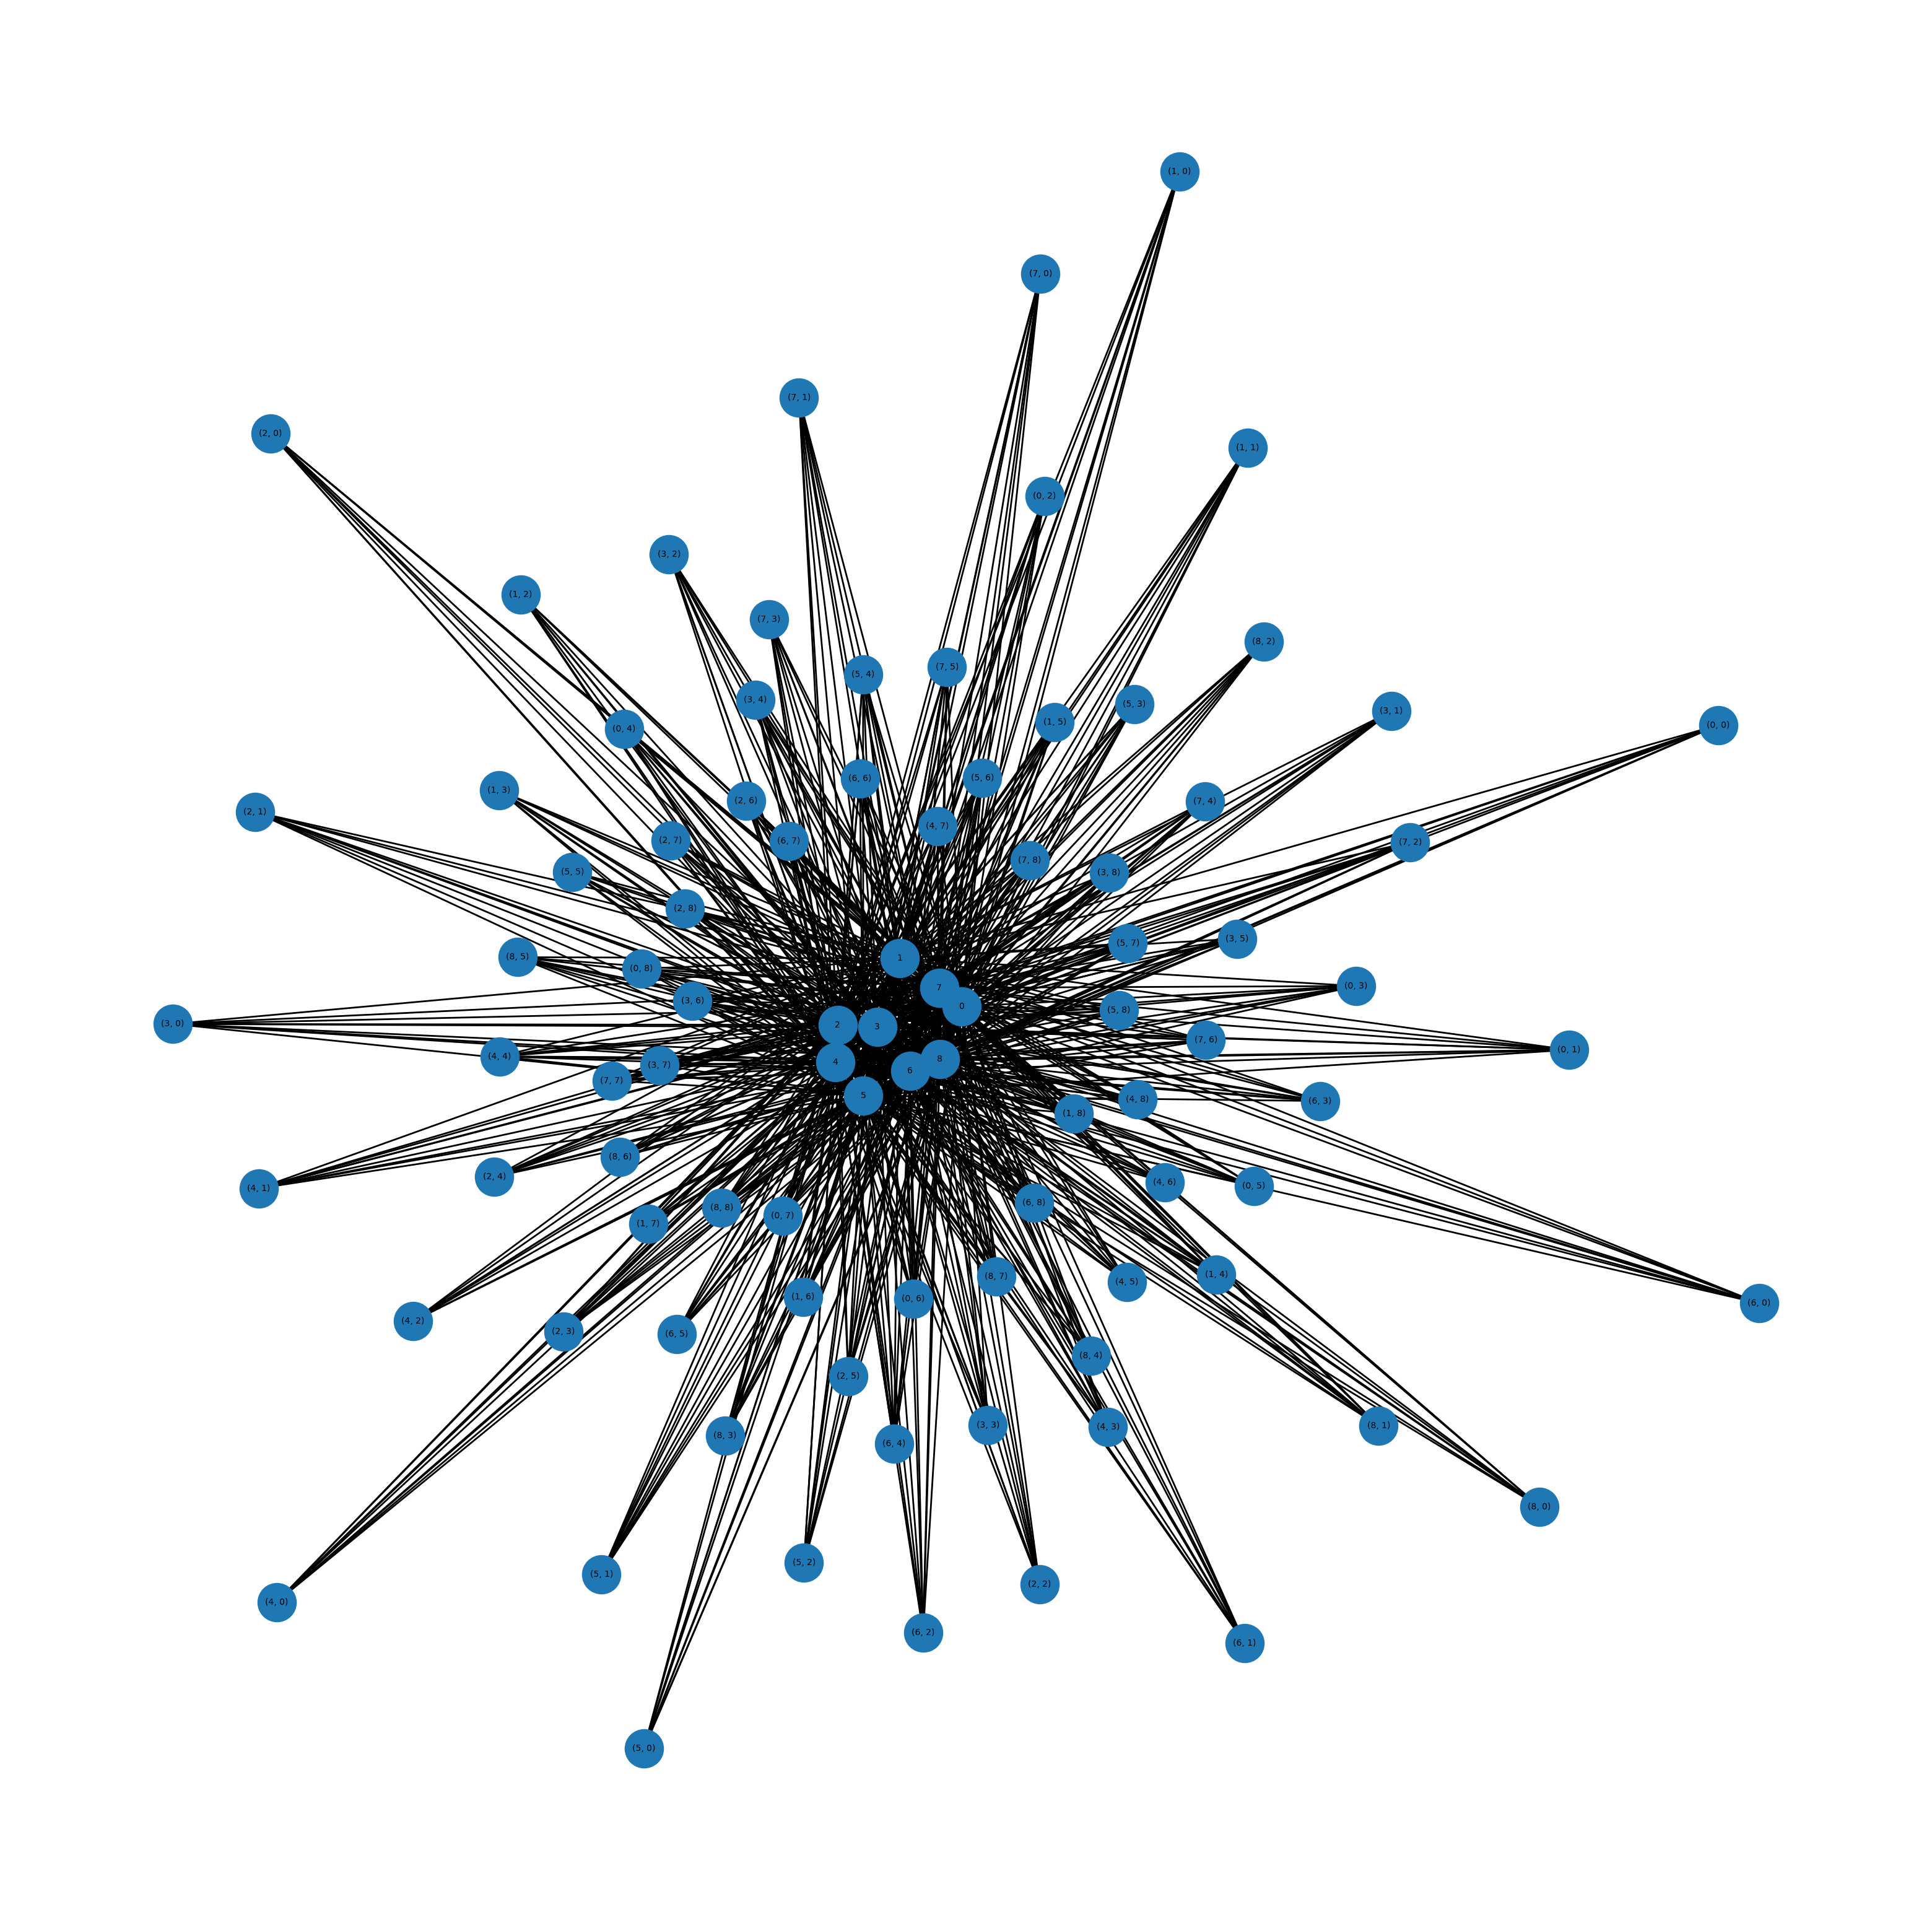

In [55]:
# Helper functions to display a Graph

def showSudokuGraph(sudokuGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = sudokuGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
showSudokuGraph(sudoku_graph)

# Depth first seach

In [16]:
def is_valid(num, edges, board):
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None


def solve_sudoku_dfs(board, graph):
    # Create a stack for DFS
    stack = []
    counter = 0
    
    # Enqueue initial board
    stack.append(board)
    
    # Start DFS
    while stack:
        current_board = stack.pop()
        # Find an empty cell
        empty_cell = find_empty_cell(current_board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell is None:
            print("steps taken:", counter)
            return current_board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row,col)], current_board):
                counter += 1
                print("trying ", num, " on (", row, col, ")")
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                # Enqueue the new board
                stack.append(new_board)

def print_board(board):
    for row in board:
        print(row)

board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board_dfs = solve_sudoku_dfs(board, sudoku_graph)
print("Final Result:")
print_board(finish_board_dfs)

trying  2  on ( 0 1 )
trying  3  on ( 0 1 )
trying  4  on ( 0 1 )
trying  5  on ( 0 1 )
trying  2  on ( 0 3 )
trying  3  on ( 0 3 )
trying  4  on ( 0 3 )
trying  4  on ( 0 4 )
trying  2  on ( 0 6 )
trying  2  on ( 1 1 )
trying  3  on ( 1 1 )
trying  4  on ( 1 1 )
trying  2  on ( 1 2 )
trying  3  on ( 1 2 )
trying  7  on ( 1 6 )
trying  3  on ( 1 6 )
trying  7  on ( 1 6 )
trying  3  on ( 1 7 )
trying  9  on ( 2 0 )
trying  3  on ( 2 1 )
trying  2  on ( 2 3 )
trying  7  on ( 2 3 )
trying  7  on ( 2 4 )
trying  6  on ( 2 5 )
trying  5  on ( 2 8 )
trying  2  on ( 3 0 )
trying  5  on ( 3 0 )
trying  3  on ( 3 2 )
trying  4  on ( 3 2 )
trying  9  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 3 5 )
trying  3  on ( 3 6 )
trying  7  on ( 4 0 )
trying  9  on ( 4 1 )
trying  3  on ( 4 5 )
trying  6  on ( 4 6 )
trying  4  on ( 4 7 )
trying  2  on ( 5 1 )
trying  3  on ( 5 2 )
trying  4  on ( 5 3 )
trying  7  on ( 5 3 )
trying  7  on ( 5 5 )
trying  1  on ( 5 6 )
trying  1  on ( 6 1 )
trying  8 

# Backtracking without constraint propagation


In [32]:
def is_valid(num, position, board):
    row, col = position
    # Check row
    if num in board[row]:
        return False
    # Check column
    if num in [board[i][col] for i in range(9)]:
        return False
    # Check 3x3 square
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    return True

def find_empty_cell_backtracking(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return -1, -1

steps = 0

def solve_sudoku_backtracking(board):
    global steps
    # Find an empty cell
    row, col = find_empty_cell_backtracking(board)
    if row == -1 and col == -1:
        return True  # Puzzle solved
    for num in range(1, 10):
        if is_valid(num, (row, col), board):
            steps += 1
            print("Step", steps, ": Placing", num, "at (", row, ",", col, ")")
            board[row][col] = num
            if solve_sudoku_backtracking(board):
                return True
            board[row][col] = 0  # Backtrack if no solution found
    return False  # No solution found

# Example Sudoku board
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]

# Solve Sudoku using backtracking
solve_sudoku_backtracking(board)

# Print the final Sudoku board
print("\nFinal Sudoku Board:")
for row in board:
    print(row)

# Print the total number of steps
print("Total steps taken:", steps)

Step 1 : Placing 2 at ( 0 , 1 )
Step 2 : Placing 3 at ( 0 , 3 )
Step 3 : Placing 4 at ( 0 , 4 )
Step 4 : Placing 5 at ( 0 , 6 )
Step 5 : Placing 3 at ( 1 , 1 )
Step 6 : Placing 4 at ( 1 , 2 )
Step 7 : Placing 2 at ( 1 , 6 )
Step 8 : Placing 7 at ( 1 , 7 )
Step 9 : Placing 5 at ( 2 , 0 )
Step 10 : Placing 9 at ( 2 , 1 )
Step 11 : Placing 2 at ( 2 , 3 )
Step 12 : Placing 7 at ( 2 , 4 )
Step 13 : Placing 6 at ( 2 , 5 )
Step 14 : Placing 7 at ( 2 , 3 )
Step 15 : Placing 9 at ( 2 , 0 )
Step 16 : Placing 5 at ( 2 , 1 )
Step 17 : Placing 2 at ( 2 , 3 )
Step 18 : Placing 7 at ( 2 , 4 )
Step 19 : Placing 6 at ( 2 , 5 )
Step 20 : Placing 7 at ( 2 , 3 )
Step 21 : Placing 7 at ( 1 , 6 )
Step 22 : Placing 4 at ( 1 , 1 )
Step 23 : Placing 3 at ( 1 , 2 )
Step 24 : Placing 2 at ( 1 , 6 )
Step 25 : Placing 7 at ( 1 , 7 )
Step 26 : Placing 5 at ( 2 , 0 )
Step 27 : Placing 9 at ( 2 , 1 )
Step 28 : Placing 2 at ( 2 , 3 )
Step 29 : Placing 7 at ( 2 , 4 )
Step 30 : Placing 6 at ( 2 , 5 )
Step 31 : Placing 7

# Breadth first search


In [ ]:
def is_valid(num, edges, board):
    
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None
    
def solve_sudoku_bfs(board, graph):
    # Create a queue for BFS
    queue = []
    counter = 0;

    # Enqueue initial board
    queue.append(board)

    # Start BFS
    while queue:
        current_board = queue.pop(0)
        # Find an empty cell
        empty_cell = find_empty_cell(current_board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell is None:
            print("steps taken:", counter)
            return current_board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row,col)], current_board):
                counter+=1
                print("trying ", num," on (",row,col,")")
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                # Enqueue the new board
                queue.append(new_board)
        

In [ ]:
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board = solve_sudoku_bfs(board,sudoku_graph)

# Greedy Search


In [23]:
def is_valid(num, edges, board):
    
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell_greedy(graph, board):
    cost_table = [[0 for _ in range(9)] for _ in range(9)]
    for i in range(9):
        for j in range(9):
            cost = 0
            for k in graph.neighbors((i,j)):
                if board[k[0]][k[1]] == 0:
                    cost += 1
            cost_table[i][j] = cost;
    min_cost = float('inf')
    row = -1
    col = -1
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0 and cost_table[i][j] < min_cost:
                min_cost = cost_table[i][j]
                row = i
                col = j
    return row,col
steps = 0
def solve_sudoku_greedy(board, graph):
    global steps
    # Start greedy search
    while True:
        # Find an empty cell with the minimum cost
        empty_cell = find_empty_cell_greedy(graph, board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell == (-1, -1):
            return board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row, col)], board):
                print("trying ", num," on (",row,col,")")
                steps+=1
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in board]
                new_board[row][col] = num
                # Recursively try to solve the puzzle with the new board
                result = solve_sudoku_greedy(new_board, graph)
                # If a solution is found, return it
                if result is not None:
                    return result
        # If no valid number was found for this cell, backtrack
        return None

In [24]:
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board = solve_sudoku_greedy(board,sudoku_graph)
print("steps taken: ", steps)

trying  1  on ( 7 8 )
trying  7  on ( 7 7 )
trying  3  on ( 1 7 )
trying  4  on ( 4 7 )
trying  7  on ( 6 4 )
trying  4  on ( 0 4 )
trying  8  on ( 6 4 )
trying  4  on ( 0 4 )
trying  7  on ( 2 4 )
trying  5  on ( 2 8 )
trying  5  on ( 7 6 )
trying  2  on ( 0 6 )
trying  7  on ( 1 6 )
trying  3  on ( 4 6 )
trying  6  on ( 4 6 )
trying  3  on ( 3 6 )
trying  1  on ( 5 6 )
trying  3  on ( 0 3 )
trying  2  on ( 2 3 )
trying  7  on ( 6 3 )
trying  6  on ( 2 5 )
trying  5  on ( 6 5 )
trying  4  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  7  on ( 4 5 )
trying  9  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  4  on ( 5 3 )
trying  7  on ( 5 5 )
trying  9  on ( 2 0 )
trying  5  on ( 3 0 )
trying  7  on ( 4 0 )
trying  2  on ( 8 0 )
trying  4  on ( 3 2 )
trying  2  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  3  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  2  on ( 1 2 )
trying  5  on ( 0 1 )
trying  4  on ( 1 1 )
trying  3 

# Uniform cost search


In [26]:
def is_valid(num, edges, board):
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def uniform_cost_search_sudoku(board, graph):
    global steps
    # Create a priority queue for UCS
    pq = queue.PriorityQueue()
    steps = 0

    # Enqueue the initial board with a priority of 0
    pq.put((0, board))

    # Start UCS
    while not pq.empty():
        _, current_board = pq.get()
        empty_cell = find_empty_cell_greedy(graph, current_board)
        if empty_cell == (-1, -1):
            return current_board
        row, col = empty_cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row, col)], current_board):
                print("trying ", num," on (",row,col,")")
                steps+=1
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                pq.put((cost(new_board, graph), new_board))

    return None

def cost(board, graph):
    total_cost = 0
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                total_cost += len(graph.all_edges()[(i, j)])
    return total_cost

# Function to print the Sudoku board
def print_sudoku_board(board):
    for row in board:
        print(row)

# Example usage
finish_board_ucs = uniform_cost_search_sudoku(board, sudoku_graph)
print("Final Sudoku Board:")
print_sudoku_board(finish_board_ucs)
print("steps taken: ", steps)

trying  1  on ( 7 8 )
trying  5  on ( 7 8 )
trying  7  on ( 7 7 )
trying  3  on ( 1 7 )
trying  4  on ( 4 7 )
trying  7  on ( 6 4 )
trying  8  on ( 6 4 )
trying  4  on ( 0 4 )
trying  4  on ( 0 4 )
trying  7  on ( 2 4 )
trying  5  on ( 2 8 )
trying  5  on ( 7 6 )
trying  2  on ( 0 6 )
trying  7  on ( 1 6 )
trying  3  on ( 4 6 )
trying  6  on ( 4 6 )
trying  3  on ( 3 6 )
trying  1  on ( 5 6 )
trying  3  on ( 0 3 )
trying  2  on ( 2 3 )
trying  7  on ( 6 3 )
trying  6  on ( 2 5 )
trying  5  on ( 6 5 )
trying  4  on ( 3 3 )
trying  9  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  7  on ( 4 5 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  7  on ( 4 5 )
trying  4  on ( 5 3 )
trying  7  on ( 5 5 )
trying  9  on ( 2 0 )
trying  5  on ( 3 0 )
trying  7  on ( 4 0 )
trying  2  on ( 8 0 )
trying  4  on ( 3 2 )
trying  2  on ( 5 2 )
trying  3  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  2  on ( 1 2 )
trying  5 